In [1]:
#! swig -c++ -python swig/ising.i
#! python swig/setup_ising.py build_ext --inplace

In [2]:
#import sys
#import os
#sys.path.append( os.path.abspath("swig") )
#import ising
import numpy as np
import matplotlib.pyplot as plt
from DataReader import DataReader as dr
import pandas as pd
import seaborn as sn

In [3]:
RehnquistIdeology = dr.getRehnquist(ideology=True)
RehnquistMM = dr.getRehnquist(mm=True)

In [4]:
#Rehnquist
WRvotes_i = RehnquistIdeology[:,0]
#Stevens
JSvotes_i = RehnquistIdeology[:,1]
#OConnor
SOvotes_i = RehnquistIdeology[:,2]
#Scalia
ASvotes_i = RehnquistIdeology[:,3]
#Kennedy
AKvotes_i = RehnquistIdeology[:,4]
#Souter
DSvotes_i = RehnquistIdeology[:,5]
#Thomas
CTvotes_i = RehnquistIdeology[:,6]
#Ginsburg
RGvotes_i = RehnquistIdeology[:,7]
#Breyer
SBvotes_i = RehnquistIdeology[:,8]

#Rehnquist
WRvotes_mm = RehnquistMM[:,0]
#Stevens
JSvotes_mm = RehnquistMM[:,1]
#OConnor
SOvotes_mm = RehnquistMM[:,2]
#Scalia
ASvotes_mm = RehnquistMM[:,3]
#Kennedy
AKvotes_mm = RehnquistMM[:,4]
#Souter
DSvotes_mm = RehnquistMM[:,5]
#Thomas
CTvotes_mm = RehnquistMM[:,6]
#Ginsburg
RGvotes_mm = RehnquistMM[:,7]
#Breyer
SBvotes_mm = RehnquistMM[:,8]

#cases = np.linspace(1,WRvotes.size,WRvotes.size)
#courtMean = np.mean(RehnquistIdeology, axis=1)

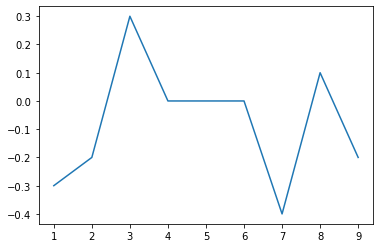

In [5]:
#Returns a number (generations) of randomly generated votes for a system of size numVotes (default is 9)
def randomVotes(generations, numVotes=9):
    return np.random.randint(-1, 2, size=(numVotes,generations))

gens = 10

u = np.zeros((gens,9))
v = randomVotes(gens)
x = np.linspace(1,9,9)
y = np.linspace(1,gens,gens)
# X,Y = np.meshgrid(x,y)

# plt.figure(dpi=150)
# plt.quiver(X,Y, u, v, scale=4.5*gens, )
# plt.xlim([0.25,9.5])
# plt.ylim([0.25,gens+0.5])
# plt.xlabel("Justice")
# plt.ylabel("Case")
# plt.xticks(np.linspace(1,9,9))
# plt.yticks(np.linspace(1,gens,gens))

# plt.show()

m = np.mean(v, axis=1)

plt.plot(x, m)
plt.show()

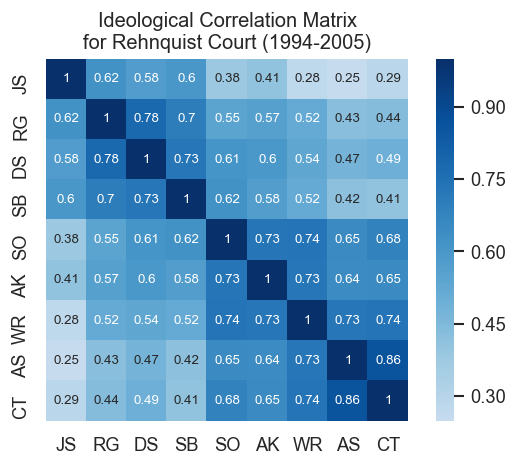

In [15]:
sn.set(style="white")

data1 = {'JS': JSvotes_i,
        'RG': RGvotes_i,
        'DS': DSvotes_i,
        'SB': SBvotes_i,
        'SO': SOvotes_i,
        'AK': AKvotes_i,
        'WR': WRvotes_i,
        'AS': ASvotes_i,
        'CT': CTvotes_i
       }

df1 = pd.DataFrame(data1,columns=['JS','RG','DS','SB','SO','AK','WR','AS','CT'])
C = df1.astype(int).corr()

plt.figure(dpi=120)
plt.title("Ideological Correlation Matrix\nfor Rehnquist Court (1994-2005)")
sn.heatmap(C, annot=True, cmap='Blues',square=True,annot_kws={"size": 8},center=0.5)
plt.show()

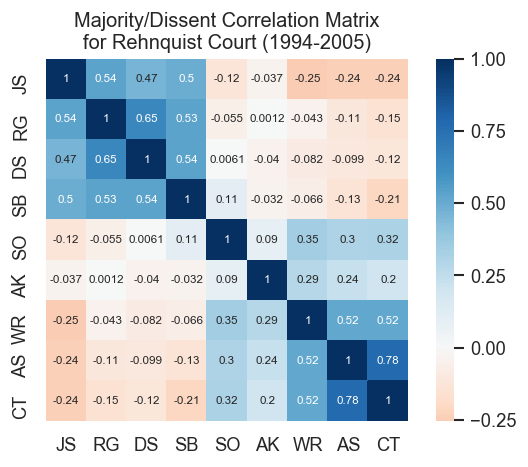

In [16]:
sn.set(style="white")

data2 = {'JS': JSvotes_mm,
        'RG': RGvotes_mm,
        'DS': DSvotes_mm,
        'SB': SBvotes_mm,
        'SO': SOvotes_mm,
        'AK': AKvotes_mm,
        'WR': WRvotes_mm,
        'AS': ASvotes_mm,
        'CT': CTvotes_mm
       }

df2 = pd.DataFrame(data2,columns=['JS','RG','DS','SB','SO','AK','WR','AS','CT'])
MD = df2.astype(int).corr()

plt.figure(dpi=120)
plt.title("Majority/Dissent Correlation Matrix\nfor Rehnquist Court (1994-2005)")
sn.heatmap(MD, annot=True, cmap='RdBu',center=0,square=True,annot_kws={"size": 7})
plt.show()

Equation 1: $S[P(\{\sigma_i\})]=-\sum_{\{\sigma_i\}}P(\{\sigma_i\})\ln{P(\{\sigma_i\})}$

Equation 2: $\sum_{\{\sigma_k\}}P(\{\sigma_k\})\sigma_i\sigma_j=C_{ij}$

Equation 3: $P(\{\sigma_i\})=\frac{1}{Z}e^{-E(\{\sigma_i\})}$

Equation 4: $E(\{\sigma_i\})=-\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

From appendix we have: $Z=\sum_{\{\sigma_i\}}e^{-E(\{\sigma_i\})}=>Z=\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j}$


Want the interaction term, $J_{ij}$


Solving Equation 3 for $E(\{\sigma_i\})$: 

$E(\{\sigma_i\})=-\ln{(Z\cdot P(\{\sigma_i\}))}$

Now plug in Equation 4:

$-\ln{(Z\cdot P(\{\sigma_i\}))}=-\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

$2\ln{((\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j})\cdot P(\{\sigma_i\}))}=\sum_{i\neq j}J_{ij}\sigma_i\sigma_j$

In [8]:
df1

,JS,RG,DS,SB,SO,AK,WR,AS,CT
0,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,-1,1,-1,1,-1,1,1
2,1,1,1,1,1,-1,1,-1,-1
3,1,1,1,1,1,1,1,1,1
4,1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
458,1,1,1,1,1,1,1,1,1
459,1,1,1,1,-1,1,-1,1,-1
460,1,1,1,1,1,1,1,-1,-1
461,1,1,1,-1,-1,-1,-1,1,1


In [38]:
C_adj = np.empty((9,9,463)) # C_ij / sigma_i sigma_j

votes = df1.to_numpy().T

for i in range(9):
    for t in range(463):
        for j in range(9):
            sigma_i = votes[i,t]
            sigma_j = votes[j,t]
            prod = sigma_i*sigma_j
            C_adj[i,j,t] = C[i,j]/prod


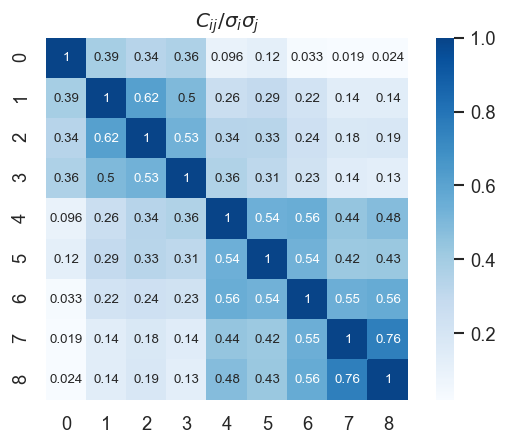

In [39]:
C_adj_avg = np.empty((9,9))

for i in range(9):
    for j in range(9):
        Csum = 0
        for t in range(463):
            Csum += C_adj[i,j,t]
        C_adj_avg[i,j] = Csum/463

plt.figure(dpi=120)
plt.title("$C_{ij}/\sigma_i \sigma_j$")
sn.heatmap(C_adj_avg, annot=True, cmap='Blues',square=True,annot_kws={"size": 8},center=0.55)
plt.show()

$\frac{C_{ij}}{\sigma_1\sigma_j}=\frac{1}{2}J_{ij}\sigma_i\sigma_j-\ln{Z}$

For a given Justice $i=0$'s interactions on all other Justices, $j$:

$\frac{C_{0j}}{\sigma_1\sigma_j}=\frac{1}{2}J_{0j}\sigma_0\sigma_j-\ln{Z}$

where

$Z=\sum_{\{\sigma_i\}}e^{\frac{1}{2}\sum_{i\neq j}J_{ij}\sigma_i\sigma_j}$

Need to solve for $J$ with Monte-Carlo